# Support Class 3 - Problem sheet 2

In [1]:
# Load some packages 
# (if you get an error, you need to install the package in the terminal)
import numpy as np                #scientific computing
from scipy.stats import lognorm   #for probability distributions
import scipy.linalg               #for e'values/vectors
import matplotlib.pyplot as plt   #plotting
import seaborn as sns             #helps with data manipulation/plotting
import math                       #calculating exponentials below

#### Question 1 (a)

Given a matrix $A \in \mathbb{R}^{n \times n}$, the Gershgorin disk theorem states that all eigenvalues lie in at least one Gershogorin disk $D_i$ such that each disk is centered on $a_{i,i}$ with radius $R_i = \sum_{j \neq i} a_{i,j}$.

First define a transition matrix P for the SRW on $\{1,2,3,4,5\}$ with periodic BCs. 

In [32]:
# define SRW jump probabilities. 
p = 0.7
q = 1-p

P = np.array([[0,p,0,0,q],[q,0,p,0,0],[0,q,0,p,0],[0,0,q,0,p],[p,0,0,q,0]])
print(P)

[[0.  0.7 0.  0.  0.3]
 [0.3 0.  0.7 0.  0. ]
 [0.  0.3 0.  0.7 0. ]
 [0.  0.  0.3 0.  0.7]
 [0.7 0.  0.  0.3 0. ]]


Next find the centres of each disk and their respective radii (all row sums are equal to 1, hence the radii will all be 1).

In [33]:
centers = np.diagonal(P)
radii = np.sum(P,axis = 1) - centers

print('Centers:',centers)
print('Radii:',radii)

Centers: [0. 0. 0. 0. 0.]
Radii: [1. 1. 1. 1. 1.]


Calculate the eigenvalues of P.

In [34]:
evals,evecs = np.linalg.eig(P)
print('Eigenvalues:')
print(evals)

Eigenvalues:
[-0.80901699+0.2351141j  -0.80901699-0.2351141j   1.        +0.j
  0.30901699+0.38042261j  0.30901699-0.38042261j]


Plot the Gershgorin disks and the eigenvalues (note how all e'vaues lie in all the disks in this case).

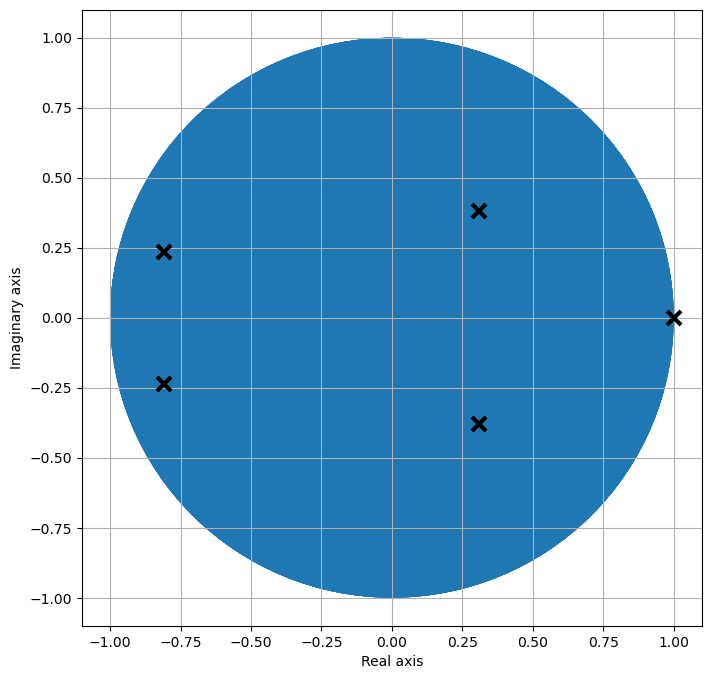

In [35]:
plt.figure(figsize = (8,8))

for i in range(len(P)):
    c1 = plt.Circle((np.real(centers[i]),np.imag(centers[i])), radii[i])
    plt.gca().add_patch(c1)
    plt.plot(np.real(evals[i]),np.imag(evals[i]),'kx',mew=3,ms=10)
    
lim=1.1
plt.xlabel("Real axis")
plt.ylabel("Imaginary axis")
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()


#### Question 1 (b)
Next we look at the Lazy version of this Markov chain, where we alter the transition matrix $P$ to be $P^{\varepsilon}$:

$$ p^{\varepsilon} (x,y) = \varepsilon \delta_{x,y} + (1 - \varepsilon) p(x,y).  $$

In [36]:
# define SRW jump probabilities. 
ε = 0.75

P_eps = ε*np.eye(len(P)) + (1-ε)*P

print(P_eps)

[[0.75  0.175 0.    0.    0.075]
 [0.075 0.75  0.175 0.    0.   ]
 [0.    0.075 0.75  0.175 0.   ]
 [0.    0.    0.075 0.75  0.175]
 [0.175 0.    0.    0.075 0.75 ]]


Follow the same process laid out in the previous part.

In [37]:
centers_eps = np.diagonal(P_eps)
radii_eps = np.sum(P_eps,axis = 1) - centers_eps

print('Centers:',centers_eps)
print('Radii:',radii_eps)
print()

evals_eps,evecs_eps = np.linalg.eig(P_eps)
print('Eigenvalues:')
print(evals_eps)
print()

print('Predicted eigenvalues:')
print(evals*(1-ε) + ε)

Centers: [0.75 0.75 0.75 0.75 0.75]
Radii: [0.25 0.25 0.25 0.25 0.25]

Eigenvalues:
[0.54774575+0.05877853j 0.54774575-0.05877853j 1.        +0.j
 0.82725425+0.09510565j 0.82725425-0.09510565j]

Predicted eigenvalues:
[0.54774575+0.05877853j 0.54774575-0.05877853j 1.        +0.j
 0.82725425+0.09510565j 0.82725425-0.09510565j]


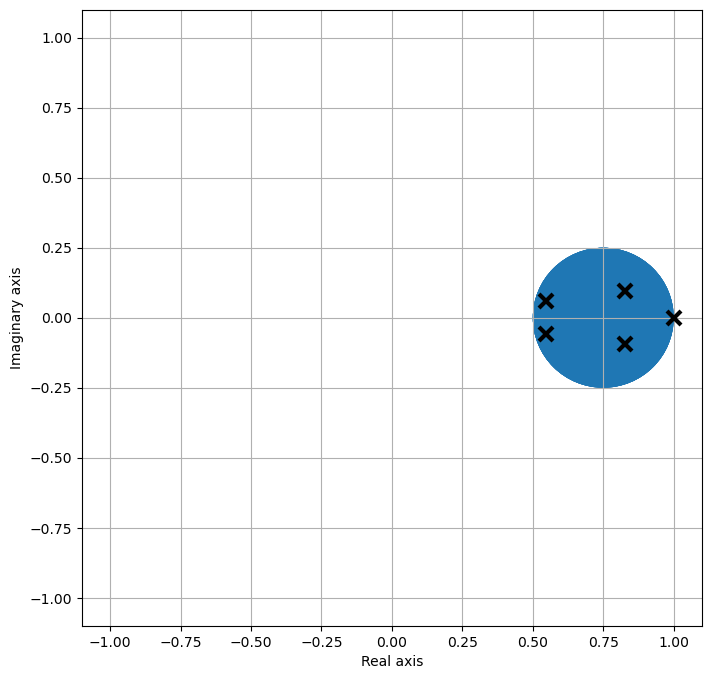

In [38]:
plt.figure(figsize = (8,8))
for i in range(5):
    c1 = plt.Circle((np.real(centers_eps[i]),np.imag(centers_eps[i])), radii_eps[i])
    plt.gca().add_patch(c1)
    plt.plot(np.real(evals_eps[i]),np.imag(evals_eps[i]),'kx',mew=3,ms=10)
plt.xlabel("Real axis")
plt.ylabel("Imaginary axis")
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()


#### Question 1 (c)(ii)
Compute the eigenvalues of the seven-state MC with transition matrix:

In [42]:
P = np.array([[0,0,0.5,0.25,0.25,0,0],[0,0,1/3,0,2/3,0,0],[0,0,0,0,0,1/3,2/3],[0,0,0,0,0,0.5,0.5],[0,0,0,0,0,0.75,0.25],[0.5,0.5,0,0,0,0,0],[0.25,0.75,0,0,0,0,0]])
print(np.around(P,2))

[[0.   0.   0.5  0.25 0.25 0.   0.  ]
 [0.   0.   0.33 0.   0.67 0.   0.  ]
 [0.   0.   0.   0.   0.   0.33 0.67]
 [0.   0.   0.   0.   0.   0.5  0.5 ]
 [0.   0.   0.   0.   0.   0.75 0.25]
 [0.5  0.5  0.   0.   0.   0.   0.  ]
 [0.25 0.75 0.   0.   0.   0.   0.  ]]


In [43]:
evals,evecs = scipy.linalg.eig(P,left=True,right=False)
print('Eigenvalues:')
print(evals)
print()
print('Absolute value of eigenvalues:')
print(np.abs(evals))

Eigenvalues:
[-5.00000000e-01+0.8660254j  -5.00000000e-01-0.8660254j
  1.00000000e+00+0.j         -3.20708428e-01+0.j
  1.60354214e-01+0.27774165j  1.60354214e-01-0.27774165j
 -3.09802976e-18+0.j        ]

Absolute value of eigenvalues:
[1.00000000e+00 1.00000000e+00 1.00000000e+00 3.20708428e-01
 3.20708428e-01 3.20708428e-01 3.09802976e-18]


Centers: [0. 0. 0. 0. 0. 0. 0.]
Radii: [1. 1. 1. 1. 1. 1. 1.]


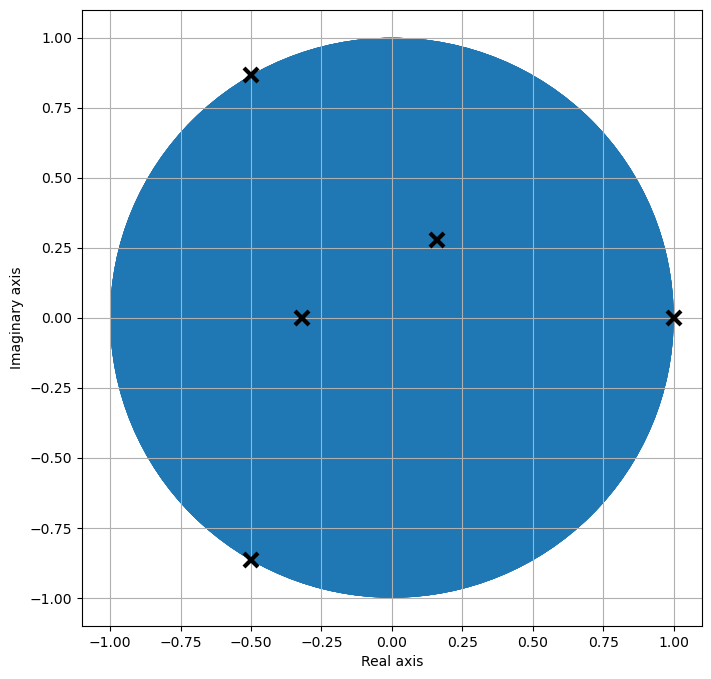

In [44]:
centers = np.diagonal(P)
radii = np.sum(P,axis = 1) - centers
print('Centers:',centers)
print('Radii:',radii)

plt.figure(figsize = (8,8))
for i in range(5):
    c1 = plt.Circle((np.real(centers[i]),np.imag(centers[i])), radii[i])
    plt.gca().add_patch(c1)
    plt.plot(np.real(evals[i]),np.imag(evals[i]),'kx',mew=3,ms=10)
    
plt.xlabel("Real axis")
plt.ylabel("Imaginary axis")
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()

Find the real e'value equal to one, and then the corresponding e'vector is the stationary distribution.

In [11]:
index = np.where(np.round(np.real(evals)) == 1)
stationary_unscaled = evecs[:,index]

print(np.around(stationary_unscaled.T,2))

[[[-0.32+0.j -0.51+0.j -0.33+0.j -0.08+0.j -0.42+0.j -0.46+0.j -0.37+0.j]]]


Scale the e'vector to obtain the stationary distribution. 

In [12]:
stationary = np.abs(np.real(stationary_unscaled))/np.sum(np.abs(np.real(stationary_unscaled)))
print(np.around(stationary.T,2))

[[[0.13 0.2  0.13 0.03 0.17 0.19 0.15]]]


#### Question 1 (c)(iii)
Simulate the DTMC above by adapting the code from last week:

In [13]:
#This is a python function for simulating the RW. It takes inputs:
# P: transistion matrix (7 by 7)
# tmax: number of time steps
# N: no. of independent random walks to simulate
# IC: initial starting position for each of the chains (array of length N)

def SevenStateMC(P, tmax, N, IC):
    Y = np.zeros((N,tmax))          #array to store the state of the MC at each time for each realisation
    Y[:,0] = IC                     #initialise all realisations
    
    #simulate the chain for each time step in a loop
    for j in range(0,tmax-1):
        #these indexes finds out where the current state is (for each realisation)
        state1 = (Y[:,j] == 1)
        state2 = (Y[:,j] == 2)
        state3 = (Y[:,j] == 3)
        state4 = (Y[:,j] == 4)
        state5 = (Y[:,j] == 5)
        state6 = (Y[:,j] == 6)
        state7 = (Y[:,j] == 7)
        
        #next we randomly sample from choices [1,...,7] with probability for each given by the row of the current state j
        # (we do this N times, where N is the number of states currently in state j)
        # i.e. at t = 0, suppose all realisations are in state 1, therefore we sample N times 
        # with probabilities given by the first row of P. 
        r1 = np.random.choice([1,2,3,4,5,6,7],sum(state1),replace=True,p = P[0,:])
        r2 = np.random.choice([1,2,3,4,5,6,7],sum(state2),replace=True,p = P[1,:])
        r3 = np.random.choice([1,2,3,4,5,6,7],sum(state3),replace=True,p = P[2,:])
        r4 = np.random.choice([1,2,3,4,5,6,7],sum(state4),replace=True,p = P[3,:])
        r5 = np.random.choice([1,2,3,4,5,6,7],sum(state5),replace=True,p = P[4,:])
        r6 = np.random.choice([1,2,3,4,5,6,7],sum(state6),replace=True,p = P[5,:])
        r7 = np.random.choice([1,2,3,4,5,6,7],sum(state7),replace=True,p = P[6,:])
        
        #now we advance each of the states at time j, to the new states at time j+1
        Y[state1,j+1] = r1
        Y[state2,j+1] = r2
        Y[state3,j+1] = r3
        Y[state4,j+1] = r4
        Y[state5,j+1] = r5
        Y[state6,j+1] = r6
        Y[state7,j+1] = r7
        
    return Y

In [14]:
#now we can answer the question (run the function) and plot the empirical distributions vs. the theoretical
tmax = 1000
N = 100
IC = np.ones(N)
#IC = np.random.choice([1,2,3,4,5,6,7],N,replace=True)

Y = SevenStateMC(P,tmax,N,IC)

def plotMC(Y,time):
    plt.figure(figsize = (8,4))
    plt.title('Empirical dist. at time {}'.format(time))
    plt.grid()
    sns.distplot(Y[:,time-1],bins = [0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25,5.75,6.25,6.75,7.25],kde=False)
    plt.xticks([1,2,3,4,5,6,7])
    plt.xlabel("State")
    plt.ylabel("Frequency")
    plt.show()

/home/nugent/anaconda3/envs/MA933/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


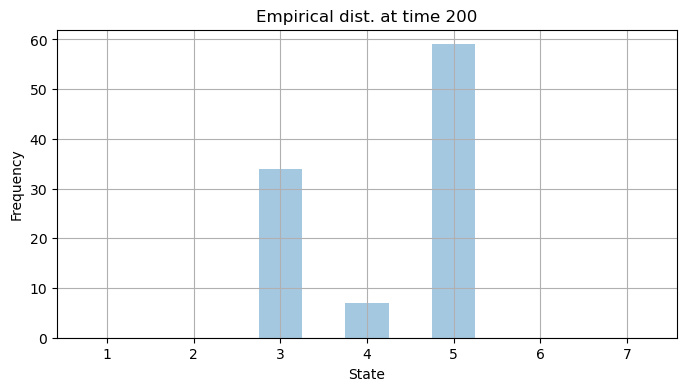

In [15]:
plotMC(Y,200)

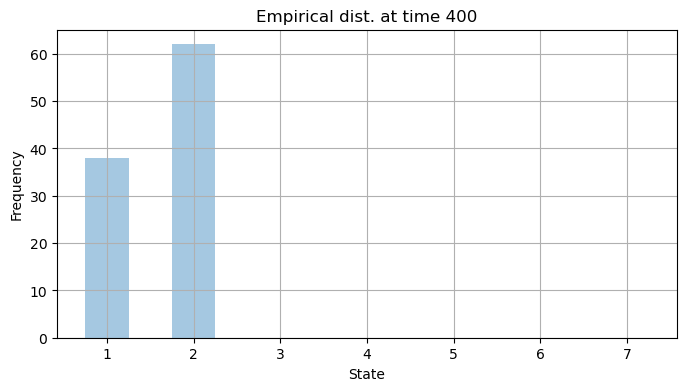

In [16]:
plotMC(Y,400)

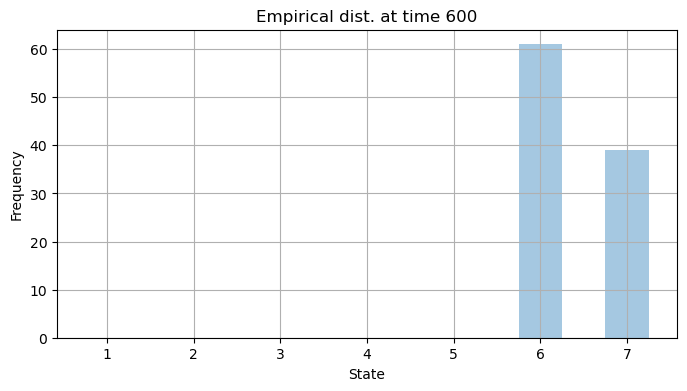

In [17]:
plotMC(Y,600)

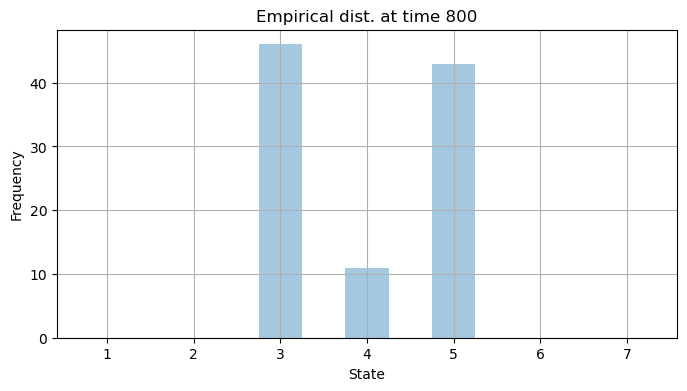

In [18]:
plotMC(Y,800)

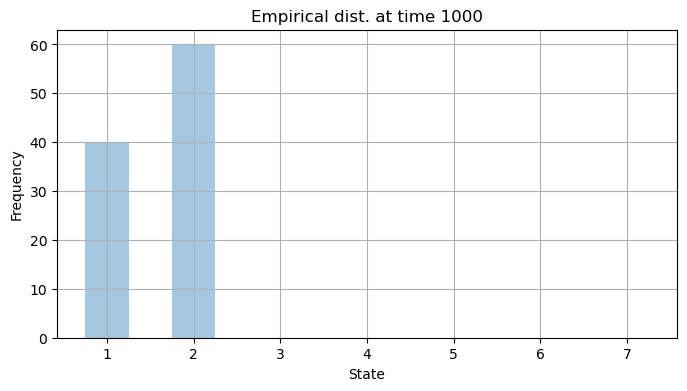

In [19]:
plotMC(Y,1000)

So the chain jumps around between multiple subsets of states as time passes. So now lets calculate the propration of time spend in each state up to time $1000$. 

In [20]:
counts_500secs = np.zeros(7)
counts_1000secs = np.zeros(7)

for i in range(0,7):
    counts_500secs[i] = (Y[0,0:500] == i+1).sum()
    counts_1000secs[i] = (Y[0,0:1000] == i+1).sum()
    
counts_500secs = counts_500secs/500
counts_1000secs = counts_1000secs/1000

print(counts_500secs)
print(counts_1000secs)

[0.128 0.206 0.116 0.042 0.176 0.19  0.142]
[0.134 0.2   0.138 0.037 0.158 0.173 0.16 ]


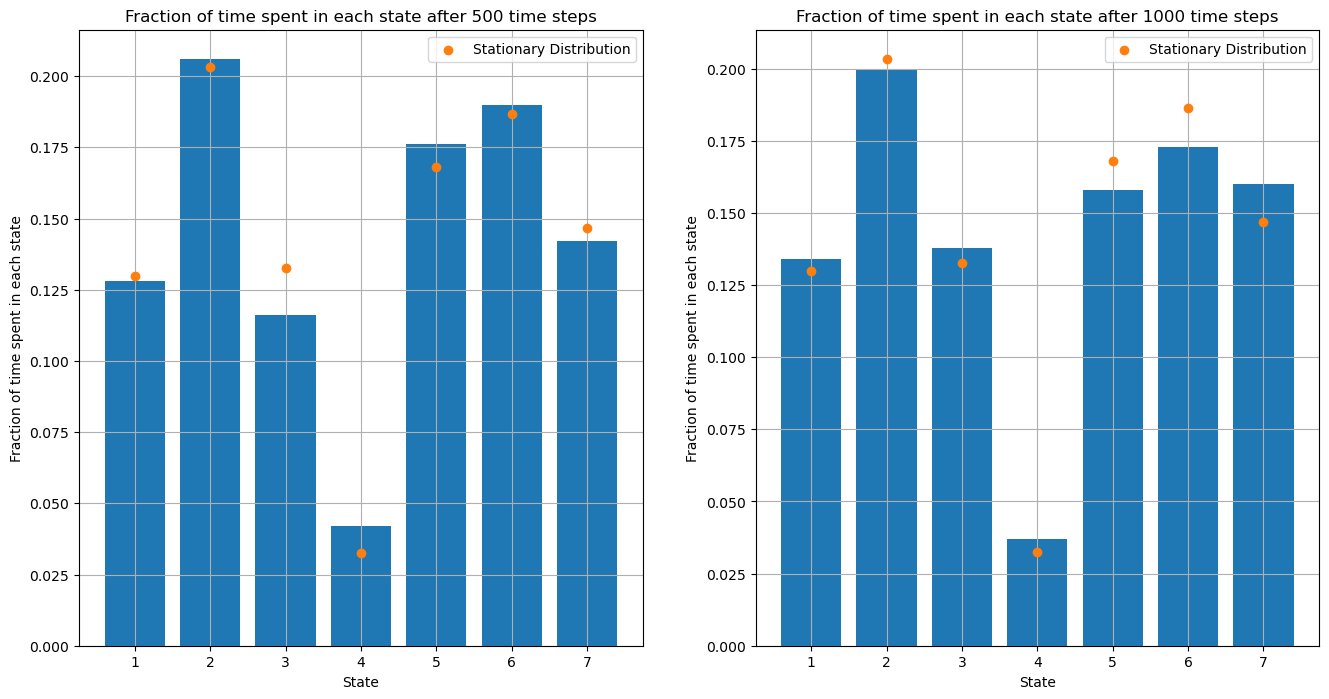

In [21]:
#Plots of the total time spent in each state.

#stationary = np.array([0.1300, 0.2034, 0.1328, 0.0325, 0.1681, 0.1866, 0.1468])
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
plt.bar(range(1,8), counts_500secs, width=0.8, bottom=None,  align='center', data=None )
plt.scatter(range(1,8),stationary, label = 'Stationary Distribution',zorder=2)
plt.title('Fraction of time spent in each state after 500 time steps')
plt.xlabel("State")
plt.ylabel("Fraction of time spent in each state")
plt.legend(loc = 'upper right')
plt.grid()

plt.subplot(1,2,2)
plt.bar(range(1,8), counts_1000secs, width=0.8, bottom=None,  align='center', data=None)
plt.scatter(range(1,8),stationary, label = 'Stationary Distribution',zorder=2)
plt.title('Fraction of time spent in each state after 1000 time steps')
plt.xlabel("State")
plt.ylabel("Fraction of time spent in each state")
plt.legend(loc = 'upper right')
plt.grid()


#### Question 2 (d) - Geometric Random Walk
Here we're going to define a function (much like notebook 1) that simulates N realisations of the Geometric Random Walk (GRW). Each walk will have initial position 1.

In [22]:
#Inputs:
# μ: mean of the (iid) Gaussian random variables
# σ: standard deviation of the (iid) Gaussian random variables
# tmax: number of time steps
# N: no. of independent random walks to simulate

def GRW(μ, σ, tmax, N):

    X = np.random.normal(μ,σ,(N,tmax))  #samples N x tmax Gaussian random variables
    Z = np.zeros((N,tmax))              #array to store the random walks at each time
    Z[:,0] = 1                          #start each walk from 1
    for i in range(0, tmax-1):          #loop carries out the random walks over time
        Z[:,i+1] = np.multiply(Z[:,i],np.exp(X[:,i]))
    return Z

Let us test the function and plot the results.

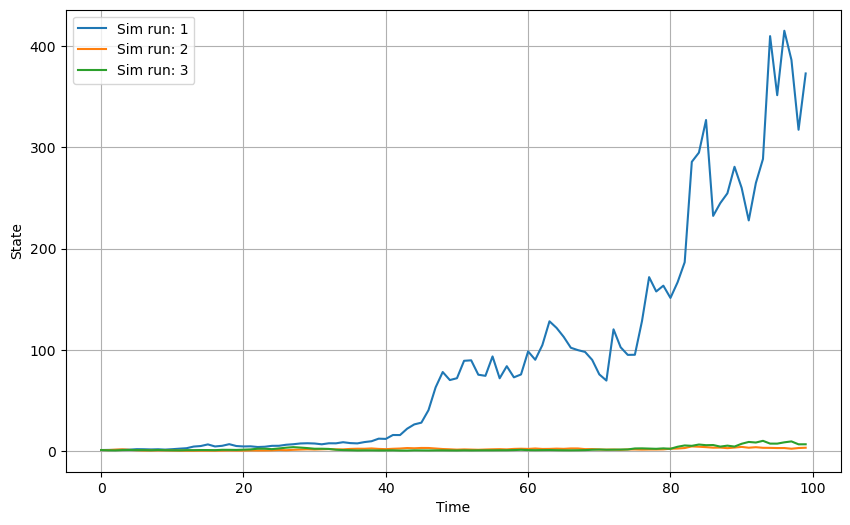

In [23]:
#this generates 3 SRWs, over 100 time steps, with μ = 0 and σ = 0.2.
μ = 0
σ = 0.2
tmax = 100
N = 3
Z = GRW(μ,σ,tmax,N)

#matplotlib inline
plt.figure(figsize = (10,6))
plt.grid()
for k in range(0, N):
    plt.plot(range(tmax), Z[k,:], label = 'Sim run: {}'.format(k+1))
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.legend()


Now to answer the question: simulating 500 realisations with 100 time steps.

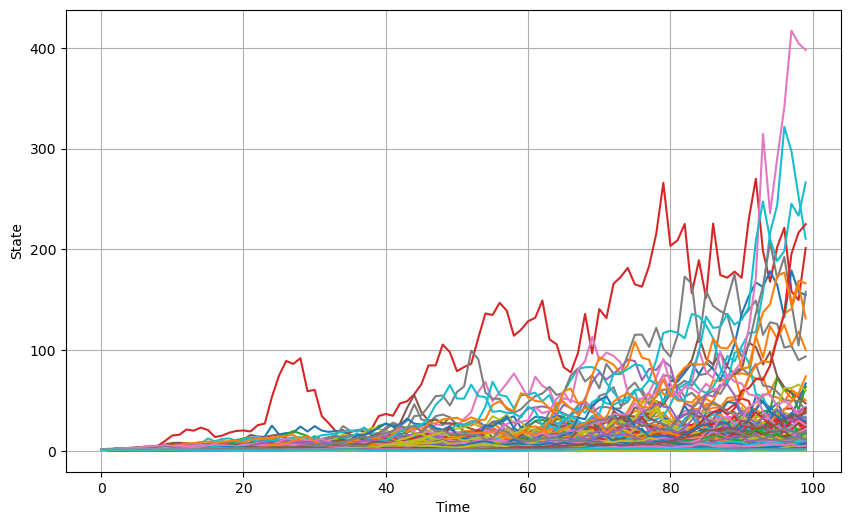

In [24]:
μ = 0
σ = 0.2
tmax = 100
N = 500

ZZ = GRW(μ,σ,tmax,N)

#matplotlib inline
plt.figure(figsize = (10,6))
plt.grid()
for k in range(0, N):
    plt.plot(range(tmax), ZZ[k,:])
    plt.xlabel('Time')
    plt.ylabel('State')

First we plot the empirical average (as a function of time n) - i.e. where is the RW on average at each time:
    
$$ \hat{\mu}_n = \frac{1}{N} \sum_{i=1}^M Z_n^{i}. $$

In [25]:
average = np.mean(ZZ, axis = 0)
std = np.std(ZZ, axis = 0)

theoretical_average = [math.exp(n*μ + (n*σ**2)/2) for n in range(tmax)]
theoretical_std = [math.exp((n*(σ**2)) - 1)*math.exp(2*n*μ + n*(σ**2)) for n in range(tmax)]

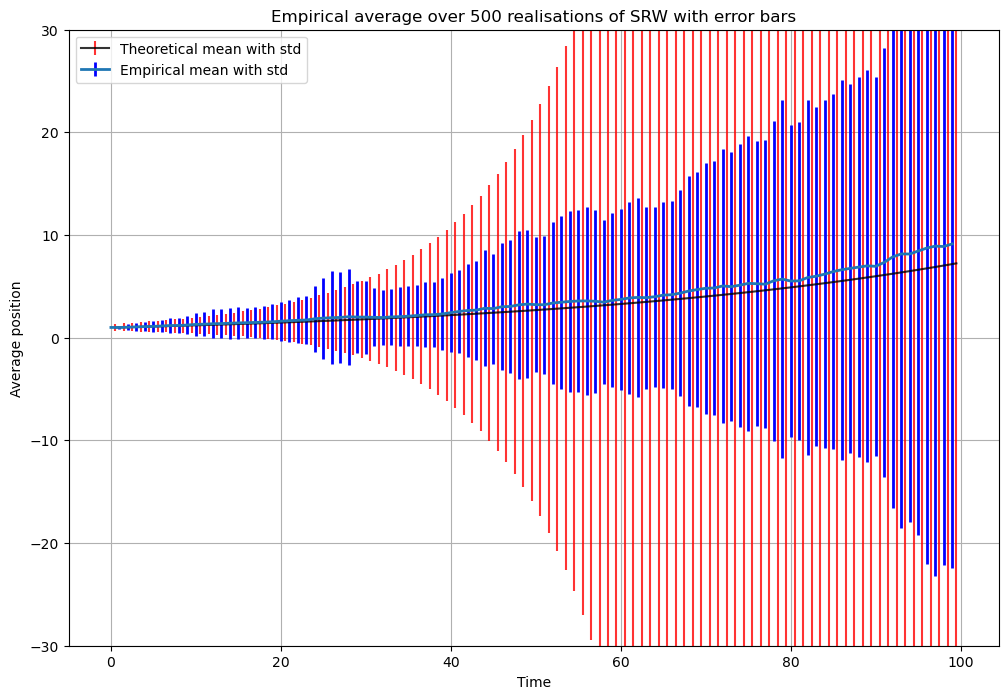

In [26]:
#now plot
shift = 0.5 #to display difference between error bars

plt.figure(figsize = (12,8))
plt.errorbar(np.linspace(0,tmax-1,tmax)+shift, theoretical_average, yerr = theoretical_std, ecolor = 'red', color = 'black', alpha = 0.8,  label = "Theoretical mean with std")
plt.errorbar(np.linspace(0,tmax-1,tmax), average, yerr = std, ecolor = 'blue',  linewidth = 2, label = "Empirical mean with std")
plt.title("Empirical average over {} realisations of SRW with error bars".format(N))
plt.xlabel("Time")
plt.ylabel("Average position")
plt.ylim((-30,30))
plt.legend(loc = 'upper left')
plt.grid()

At $n=10$ and $n=100$ produce histograms of the distribution of walks, plot the kernel density estimate (i.e. an empirical pdf curve), and compare to the theoretical distribution.

/home/nugent/anaconda3/envs/MA933/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

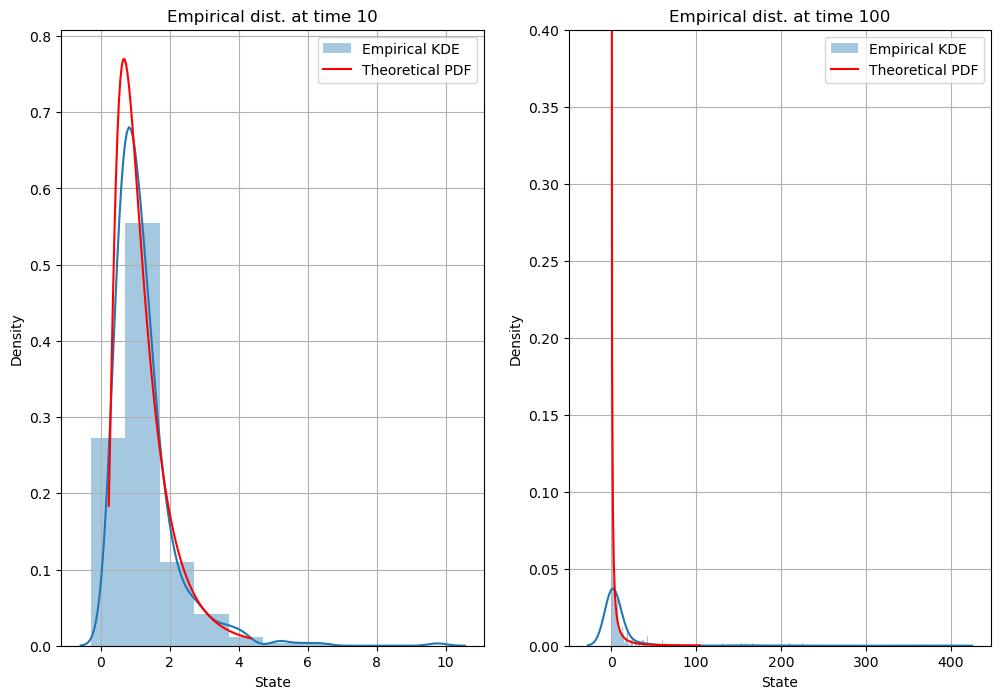

In [27]:
time1 = 10
time2 = 100

# for theoretical pdfs
x1 = np.linspace(lognorm.ppf(0.01, np.sqrt(time1)*σ, time1*μ),lognorm.ppf(0.99, np.sqrt(time1)*σ,time1*μ), 100)
x2 = np.linspace(lognorm.ppf(0.01, np.sqrt(time2)*σ, time2*μ),lognorm.ppf(0.99, np.sqrt(time2)*σ,time2*μ), 100)

plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
plt.title('Empirical dist. at time 10')
plt.grid()
sns.distplot(ZZ[:,time1-1],bins = np.arange(np.min(ZZ[:,time1-1])-0.5,np.max(ZZ[:,time1-1])+0.5,1),kde=True,label='Empirical KDE')
plt.plot(x1, lognorm.pdf(x1, np.sqrt(time1)*σ, time1*μ),'r-', label='Theoretical PDF')
plt.legend()
plt.xlabel('State')
plt.ylabel('Density')

plt.subplot(1,2,2)
plt.title('Empirical dist. at time 100')
plt.grid()
sns.distplot(ZZ[:,time2-1],bins = np.arange(np.min(ZZ[:,time2-1])-0.5,np.max(ZZ[:,time2-1])+0.5,1),kde=True,label='Empirical KDE')
plt.plot(x2, lognorm.pdf(x2, np.sqrt(time2)*σ, time2*μ),'r-', label='Theoretical PDF')
plt.legend()
plt.ylim(0,0.4)
plt.xlabel('State')
plt.ylabel('Density')

For a single realisation, we now plot the ergodic average (essentially shows that over time, the RW will will visit every possible state in the state space).

$$ \bar{\mu}_T = \frac{1}{T} \sum_{n=1}^T Z_n. $$

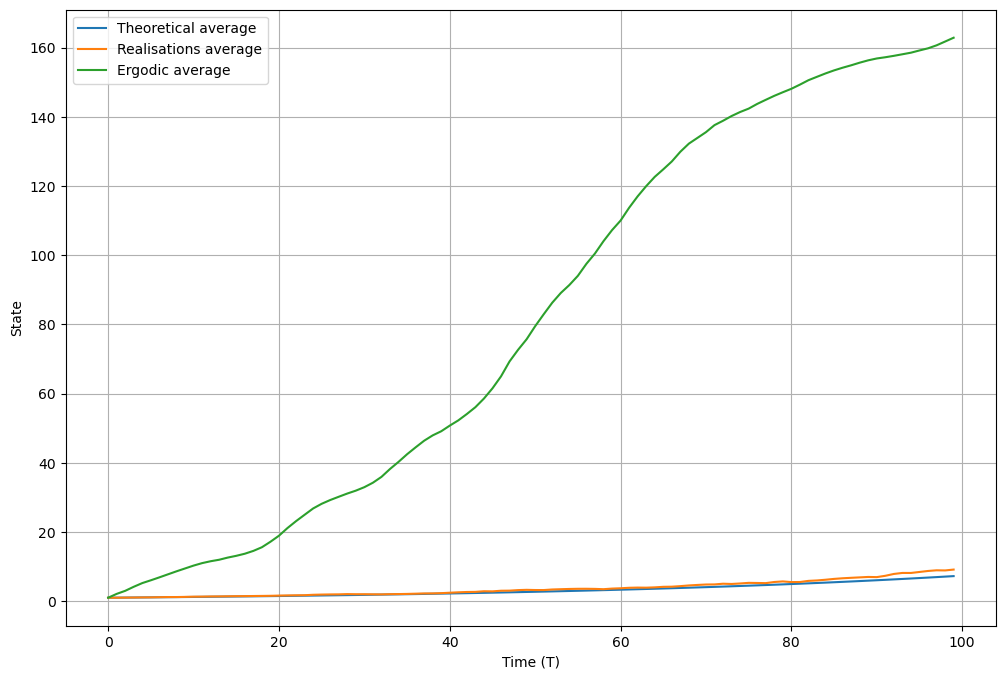

In [28]:
ergodic_avg = np.cumsum(ZZ[0,:])
tmax = 100

plt.figure(figsize = (12,8))
plt.plot(range(0,tmax), theoretical_average, label = 'Theoretical average')
plt.plot(range(0,tmax), average, label = 'Realisations average')
plt.plot(range(0,tmax), ergodic_avg, label = 'Ergodic average')
plt.xlabel("Time (T)")
plt.ylabel("State")
plt.grid()
plt.legend()
